## The Battle for Neighourhood - Toronto

## Introduction




#### A family wants to decide which neighborhood to live in Toronto. A typical family would have at least one child. There are a few consideration for a family to decide which neighborhood to live in. The following are a few venues to consider when choosing a neighborhood:

#### 1) Grocery Stores - Since most families eat at home, they have to be closed to at least one grocery store.
#### 2) Shopping Mall - For a busy family a shopping mall would be an ideal place to shop in one area and also for entertainment. 
#### 3) Parks - For a family to enjoy the outdoors and get exercise.
#### 4) Movie Theatres - This is for family entertainment. 
#### 5) Gym - The family also have to have access to a gym for exercise.
#### 6) Pharmacy - Family do get sick (especially children) and they would require access to medicines from the pharmacy. 

#### There may be other venues that are included in the list.



#############################################################################################################################################################################################################

#### Read Reading Toronto Geospatial data

In [1]:
import pandas as pd
df2 = pd.read_csv("http://cocl.us/Geospatial_data")

#### Read the table from Wikipedia that contains Neighbourhood, Borough and Postal Code data

In [2]:
import numpy as np
import pandas
import requests
from bs4 import BeautifulSoup
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pandas.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()]  # to filter out bad rows
df = df[df.Borough != 'Not assigned']
df['Neighbourhood'] = np.where(df['Neighbourhood'] == 'Not assigned', df['Borough'], df['Neighbourhood'])
result = df.groupby(['PostalCode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()

#### Combining Longitude and Latitude with Neighbourhood, Borough and Postal Code data

In [3]:
import pandas as pd
df3 = pd.merge(df, df2.rename(columns={'Postal Code':'PostalCode'}), on='PostalCode',  how='left')
df4 = pandas.DataFrame(df3, columns=['PostalCode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'])
df4[~df4['PostalCode'].isnull()]  # to filter out bad rows
df4 = df3[df3.Borough != 'Not assigned']
df4['Neighbourhood'] = np.where(df4['Neighbourhood'] == 'Not assigned', df4['Borough'], df4['Neighbourhood'])
result = df4.groupby(['PostalCode','Borough','Latitude','Longitude'])['Neighbourhood'].apply(', '.join).reset_index()
result
df5 =pandas.DataFrame(result)
df5 = df5[['PostalCode','Borough','Neighbourhood','Latitude','Longitude']]

In [4]:
df5

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


#### Determine the Top 3 Neighbourhoods in each Borough in Toronto

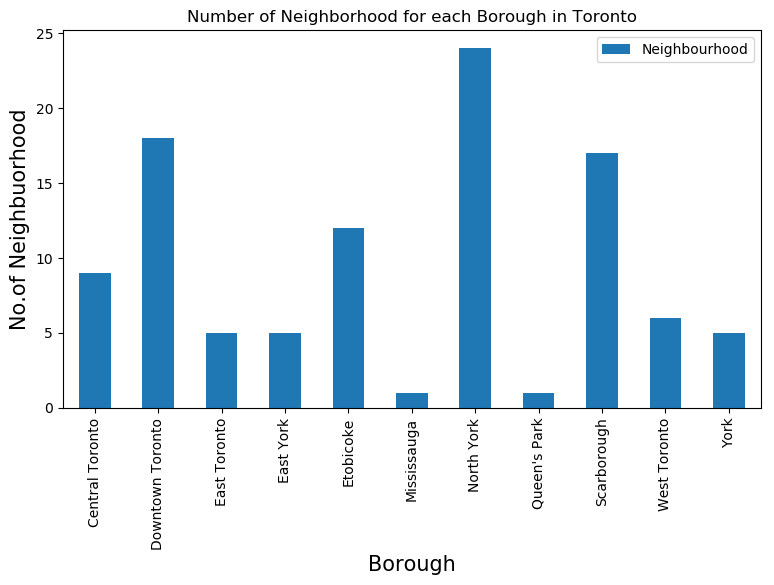

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighbuorhood', fontsize=15)
#giving a bar plot
df5.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


#### The top 3 Borough are: North York, Downtown Toronto and Scarborough. The analysis will be based on these three boroughs. 

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Get Geo coordinates of Toronto

In [8]:
address = 'Toronto'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


### Create Map of Toronto

In [9]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df5['Latitude'], df5['Longitude'], df5['Borough'], df5['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [10]:
Downtown_Toronto = df5[df5['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Downtown_Toronto.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [11]:
North_York = df5[df5['Borough'] == 'North York'].reset_index(drop=True)
North_York.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"Silver Hills, York Mills",43.757490,-79.374714
4,M2M,North York,"Newtonbrook, Willowdale",43.789053,-79.408493


In [12]:
Scar = df5[df5['Borough'] == 'Scarborough'].reset_index(drop=True)
Scar.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [13]:
toronto_data = pd.concat([Downtown_Toronto, North_York, Scar],axis=0, ignore_index=True)
toronto_data

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
9,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752


### Getting Credentials for Foursquare

In [75]:
CLIENT_ID = 'RZXA3KN0VFBNSECDQVNZVI1CBBKMHNUHSMLUQYQKAIRLIDU3' # your Foursquare ID
CLIENT_SECRET = 'DUJWZYTOZKJHLE1XFTAAM0AGPG5SZNR2WWGBHM0NIUNIMKOG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RZXA3KN0VFBNSECDQVNZVI1CBBKMHNUHSMLUQYQKAIRLIDU3
CLIENT_SECRET:DUJWZYTOZKJHLE1XFTAAM0AGPG5SZNR2WWGBHM0NIUNIMKOG


#### The following are all the neighbourhood in Downtown Toronto, North York and Scarborough

In [76]:
toronto_data.loc[:, 'Neighbourhood']

0                                              Rosedale
1                           Cabbagetown, St. James Town
2                                  Church and Wellesley
3                             Harbourfront, Regent Park
4                              Ryerson, Garden District
5                                        St. James Town
6                                           Berczy Park
7                                    Central Bay Street
8                              Adelaide, King, Richmond
9     Harbourfront East, Toronto Islands, Union Station
10             Design Exchange, Toronto Dominion Centre
11                       Commerce Court, Victoria Hotel
12                       Harbord, University of Toronto
13            Chinatown, Grange Park, Kensington Market
14    CN Tower, Bathurst Quay, Island airport, Harbo...
15                      Stn A PO Boxes 25 The Esplanade
16               First Canadian Place, Underground city
17                                             C

### Identify the Neighbourhoods

In [77]:
neighborhood_latitude = toronto_data.loc[:, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[:, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[:, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 0                                              Rosedale
1                           Cabbagetown, St. James Town
2                                  Church and Wellesley
3                             Harbourfront, Regent Park
4                              Ryerson, Garden District
5                                        St. James Town
6                                           Berczy Park
7                                    Central Bay Street
8                              Adelaide, King, Richmond
9     Harbourfront East, Toronto Islands, Union Station
10             Design Exchange, Toronto Dominion Centre
11                       Commerce Court, Victoria Hotel
12                       Harbord, University of Toronto
13            Chinatown, Grange Park, Kensington Market
14    CN Tower, Bathurst Quay, Island airport, Harbo...
15                      Stn A PO Boxes 25 The Esplanade
16               First Canadian Place, Underground city
17             

In [41]:
# type your answer here
#search_query = 'Italian'
radius = 500
#print(search_query + ' .... OK!')
LIMIT = 30

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

#### Now, let's get the top 100 venues that are in Harbourfront, Regent Park within a radius of 500 meters.

In [42]:
results = requests.get(url).json()

### Get details of the venues

In [78]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [79]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

KeyError: 'groups'

In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Explore Neighborhoods in Toronto

In [26]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )



Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Bedford Park, Lawrence Manor East
Lawren

#### The following code to run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [63]:
print(toronto_venues.shape)
toronto_venues.head()

(781, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


In [64]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",30,30,30,30,30,30
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Bathurst Manor, Downsview North, Wilson Heights",18,18,18,18,18,18
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,30,30,30,30,30,30
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"CFB Toronto, Downsview East",3,3,3,3,3,3


#### The size of the resulting dataframe

In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 197 uniques categories.


In [28]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Historic Site,Hobby Shop,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0

### Analysis of the Toronto neighbourhood

In [29]:
toronto_onehot.shape

(781, 197)

In [30]:
toronto_grouped = toronto_onehot.groupby('Neighborhood')['Playground','Supermarket','Metro Station','Gym','Park','Shopping Mall','Grocery Store', 'Gym / Fitness Center','Organic Grocery','Pharmacy','Salon / Barbershop'].mean().reset_index()
toronto_grouped

,Neighborhood,Playground,Supermarket,Metro Station,Gym,Park,Shopping Mall,Grocery Store,Gym / Fitness Center,Organic Grocery,Pharmacy,Salon / Barbershop
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000
1,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000
4,Bayview Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000
6,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Birch Cliff, Cliffside West",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"CFB Toronto, Downsview East",0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
toronto_grouped.shape

(57, 12)

In [32]:
num_top_venues = 9

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                  venue  freq
0  Gym / Fitness Center  0.03
1            Playground  0.00
2           Supermarket  0.00
3         Metro Station  0.00
4                   Gym  0.00
5                  Park  0.00
6         Shopping Mall  0.00
7         Grocery Store  0.00
8       Organic Grocery  0.00


----Agincourt----
                  venue  freq
0            Playground   0.0
1           Supermarket   0.0
2         Metro Station   0.0
3                   Gym   0.0
4                  Park   0.0
5         Shopping Mall   0.0
6         Grocery Store   0.0
7  Gym / Fitness Center   0.0
8       Organic Grocery   0.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                  venue  freq
0            Playground  0.33
1                  Park  0.33
2           Supermarket  0.00
3         Metro Station  0.00
4                   Gym  0.00
5         Shopping Mall  0.00
6         Grocery Store  0.00
7  Gym / Fitness Center  0.00
8       Or

#### Display of each neighborhood along with the top 5 most common venues

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

First, let's write a function to sort the venues in descending order.

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Gym / Fitness Center,Salon / Barbershop,Pharmacy,Organic Grocery,Grocery Store,Shopping Mall,Park,Gym,Metro Station,Supermarket
1,Agincourt,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Park,Gym,Metro Station,Supermarket
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station
3,"Bathurst Manor, Downsview North, Wilson Heights",Pharmacy,Shopping Mall,Supermarket,Salon / Barbershop,Organic Grocery,Gym / Fitness Center,Grocery Store,Park,Gym,Metro Station
4,Bayview Village,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Park,Gym,Metro Station,Supermarket


Now let's create the new dataframe and display the top 10 venues for each neighborhood.

## Cluster Neighborhoods

#### Run *k*-means to cluster the neighborhood into 5 clusters.

In [62]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 3, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

In [63]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster ', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3.0,Park,Playground,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,1.0,Park,Playground,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1.0,Salon / Barbershop,Park,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1.0,Park,Gym / Fitness Center,Salon / Barbershop,Pharmacy,Organic Grocery,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1.0,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Park,Gym,Metro Station,Supermarket


In [69]:
toronto_merged = toronto_merged[np.isfinite(toronto_merged['Cluster'])]

In [72]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=1)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Cluster

#### Cluster 1

In [297]:
toronto_merged.loc[toronto_merged['Cluster'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,York Mills West,0.0,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
26,Parkwoods,0.0,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
31,"CFB Toronto, Downsview East",0.0,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
38,Glencairn,0.0,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
39,"Downsview, North Park, Upwood Park",0.0,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket


#### Cluster 1 Analysis: The different neighbourhoods have same Most Common Venues for all levels. So, if the family decide this neighbourhood match their needs, then they have choice of 5 different neighbourhood to live in. 

#### Cluster 2

In [74]:
toronto_merged.loc[toronto_merged['Cluster'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Cabbagetown, St. James Town",1.0,1.0,Park,Playground,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station
2,Church and Wellesley,1.0,1.0,Salon / Barbershop,Park,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
3,"Harbourfront, Regent Park",1.0,1.0,Park,Gym / Fitness Center,Salon / Barbershop,Pharmacy,Organic Grocery,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
4,"Ryerson, Garden District",1.0,1.0,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Park,Gym,Metro Station,Supermarket
5,St. James Town,1.0,1.0,Gym,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Park,Metro Station,Supermarket
6,Berczy Park,1.0,1.0,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
7,Central Bay Street,1.0,1.0,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station,Supermarket
8,"Adelaide, King, Richmond",1.0,1.0,Gym / Fitness Center,Salon / Barbershop,Pharmacy,Organic Grocery,Grocery Store,Shopping Mall,Park,Gym,Metro Station,Supermarket
9,"Harbourfront East, Toronto Islands, Union Station",1.0,1.0,Park,Supermarket,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station
10,"Design Exchange, Toronto Dominion Centre",1.0,1.0,Gym / Fitness Center,Gym,Salon / Barbershop,Pharmacy,Organic Grocery,Grocery Store,Shopping Mall,Park,Metro Station,Supermarket


#### Cluster 2 Analysis: This is the largest cluster of the 5 cluster. There is no similar common venue. However, based on what is important to the family, they can choose which neighbourhood. 

#### Cluster 3

In [299]:
toronto_merged.loc[toronto_merged['Cluster'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,Scarborough Village,2.0,Playground,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Park,Gym,Metro Station


#### Cluster 3 Analysis: There is one unique neighbourhood in Scarbourgh. 

#### Cluster 4

In [300]:
toronto_merged.loc[toronto_merged['Cluster'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rosedale,3.0,Park,Playground,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station
56,"Agincourt North, L'Amoreaux East, Milliken, St...",3.0,Park,Playground,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Grocery Store,Shopping Mall,Gym,Metro Station


#### Cluster 4 Analysis: Similar to cluster 1, different neighbourhoods have same Most Common Venues for all levels. So, if the family decide this neighbourhood match their needs, then they have choice of 2 different neighbourhood to live in. 

#### Cluster 5

In [301]:
toronto_merged.loc[toronto_merged['Cluster'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Christie,4.0,Grocery Store,Park,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Shopping Mall,Gym,Metro Station,Supermarket
25,Willowdale West,4.0,Pharmacy,Grocery Store,Salon / Barbershop,Organic Grocery,Gym / Fitness Center,Shopping Mall,Park,Gym,Metro Station,Supermarket
32,Downsview West,4.0,Grocery Store,Shopping Mall,Salon / Barbershop,Pharmacy,Organic Grocery,Gym / Fitness Center,Park,Gym,Metro Station,Supermarket
34,Downsview Northwest,4.0,Gym / Fitness Center,Grocery Store,Salon / Barbershop,Pharmacy,Organic Grocery,Shopping Mall,Park,Gym,Metro Station,Supermarket


#### Cluster 5 Analysis: There is no similar common venue. However, based on what is important to the family, they can choose which neighbourhood. 

### Other considerations

#### Other factors for families to consider for choosing a neighbourhood would include schools, rating of school, prices of houses, employment opportunities. This would require finding data for each consideration and combining the dataset with foursquare dataset.  